In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(
    fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

In [2]:
import random

def calc_bmi(h,w):
    bmi=w/(h/100)**2  #bmi 지수 계산 체중/(신장/100)의 제곱
    if bmi<18.5: return "1" #thin 저체중
    if bmi<25: return "2" #normal 보통
    return "3" #fat 과체중

fp=open("d:/learn/python_statistic/data/bmi.csv","w",encoding="utf-8") #파일 오픈
fp.write("height,weight,label\n") #header 저장
cnt={"1":0, "2":0, "3":0} #카운트 변수
for i in range(200000): # 0~19999
    h=random.randint(120,200) #120~200 사이의 정수 난수 
    w=random.randint(35,80) #35~80 사이의 정수 난수
    label=calc_bmi(h,w)
    cnt[label] += 1 #카운트 증가 처리
    fp.write("{0},{1},{2}\n".format(h,w,label)) #파일에 저장
    
fp.close()     #파일 닫기
print("{0}건의 데이터가 생성되었습니다.".format(cnt))

{'1': 63866, '2': 58963, '3': 77171}건의 데이터가 생성되었습니다.


In [5]:
from sklearn import metrics
import pandas as pd
df=pd.read_csv("d:/learn/python_statistic/data/bmi.csv") #데이터 파일 로딩
df.head()

,height,weight,label
0,156,59,2
1,180,43,1
2,175,61,2
3,200,55,1
4,182,55,1


In [6]:
train_cols=df.columns[0:2] #필드 0~1
X=df[train_cols] #독립변수 
y=df["label"] #종속변수

In [7]:
df.columns #필드 목록

Index(['height', 'weight', 'label'], dtype='object')

In [8]:
df.shape #데이터의 형태(차원)

(200000, 3)

In [9]:
df.describe() #기초 통계량

,height,weight,label
count,200000.000000,200000.000000,200000.000000
mean,160.004665,57.555995,2.066525
std,23.345612,13.286994,0.837116
min,120.000000,35.000000,1.000000
25%,140.000000,46.000000,1.000000
50%,160.000000,58.000000,2.000000
75%,180.000000,69.000000,3.000000
max,200.000000,80.000000,3.000000


In [10]:
df.groupby("label").mean() #클래스 1,2,3별 평균값

,height,weight
label,,
1,179.877556,47.373939
2,164.431949,58.752167
3,140.175351,65.068627


Text(0, 0.5, '빈도')

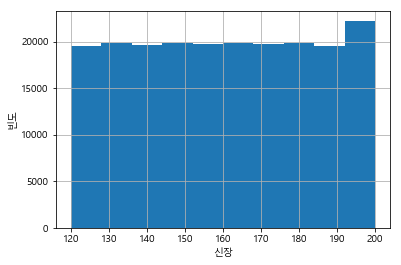

In [11]:
from matplotlib import pyplot as plt
df["height"].hist() # 신장에 대한 히스토그램
plt.xlabel("신장")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

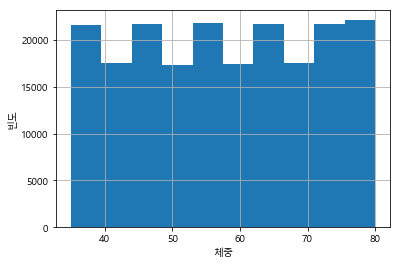

In [12]:
df["weight"].hist() # 체중에 대한 히스토그램
plt.xlabel("체중")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

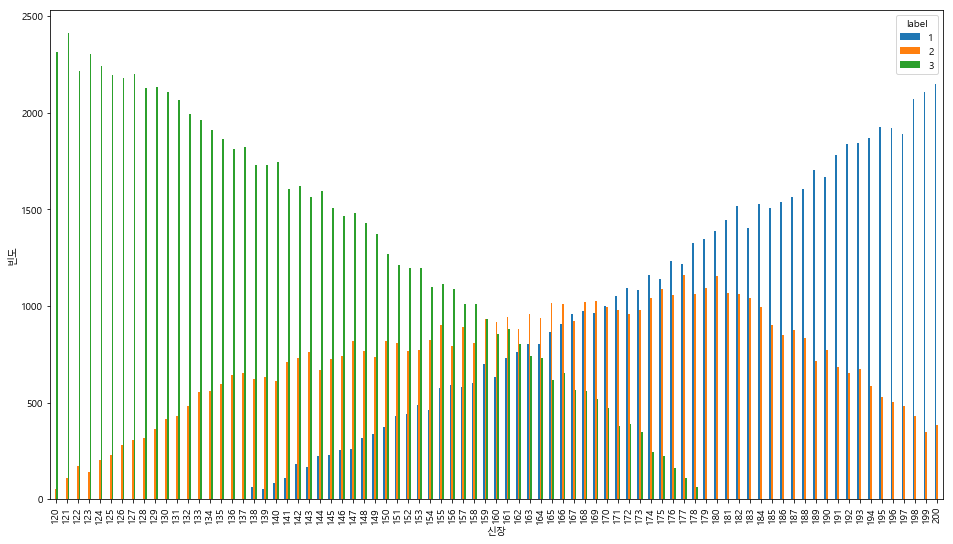

In [13]:
plt.rcParams["figure.figsize"]=(16,9) #가로,세로 인치
#label-신장별 집계
pd.crosstab(df["height"],df.label).plot(kind="bar")
plt.xlabel("신장")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

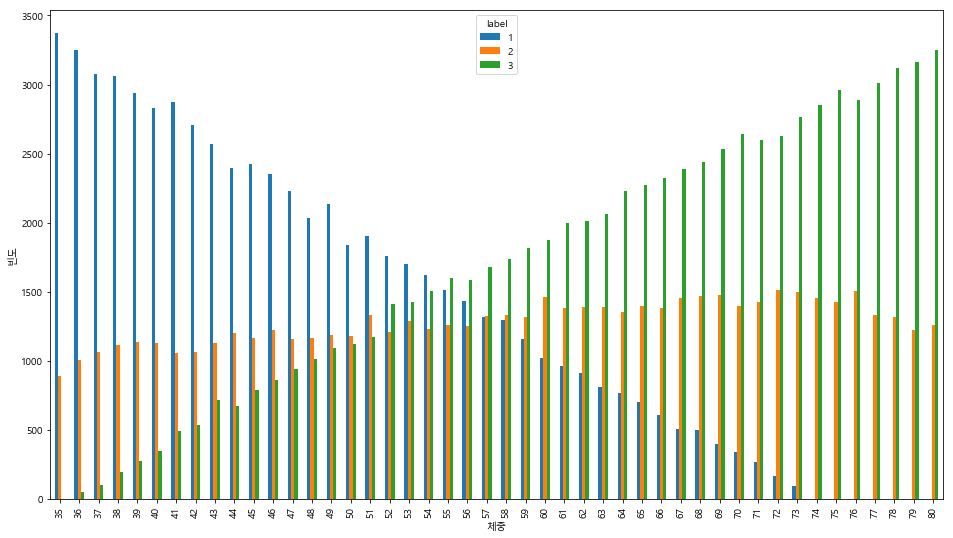

In [14]:
plt.rcParams["figure.figsize"]=(16,9)
#label-체중별 집계
pd.crosstab(df["weight"],df.label).plot(kind="bar")
plt.xlabel("체중")
plt.ylabel("빈도")

In [15]:
df["label"].value_counts() # 1,2,3 클래스별로 집계

3    77171
1    63866
2    58963
Name: label, dtype: int64

Text(0.5, 1.0, '분류\n(1:thin, 2:normal, 3:fat)')

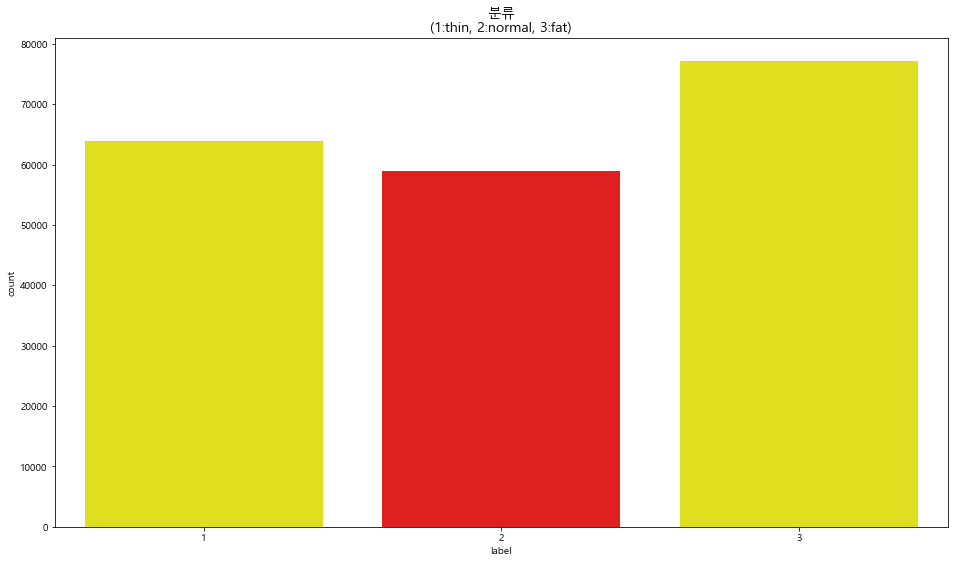

In [16]:
import seaborn as sns
colors=["yellow","red"]
sns.countplot("label",data=df,palette=colors)
plt.title("분류\n(1:thin, 2:normal, 3:fat)",fontsize=14)

In [17]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=["label"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [18]:
df2["label"].value_counts() #제일 적은 샘플을 기준으로 언더샘플링

3    58963
2    58963
1    58963
Name: label, dtype: int64

Text(0.5, 1.0, '분류\n(1:thin, 2:normal, 3:fat)')

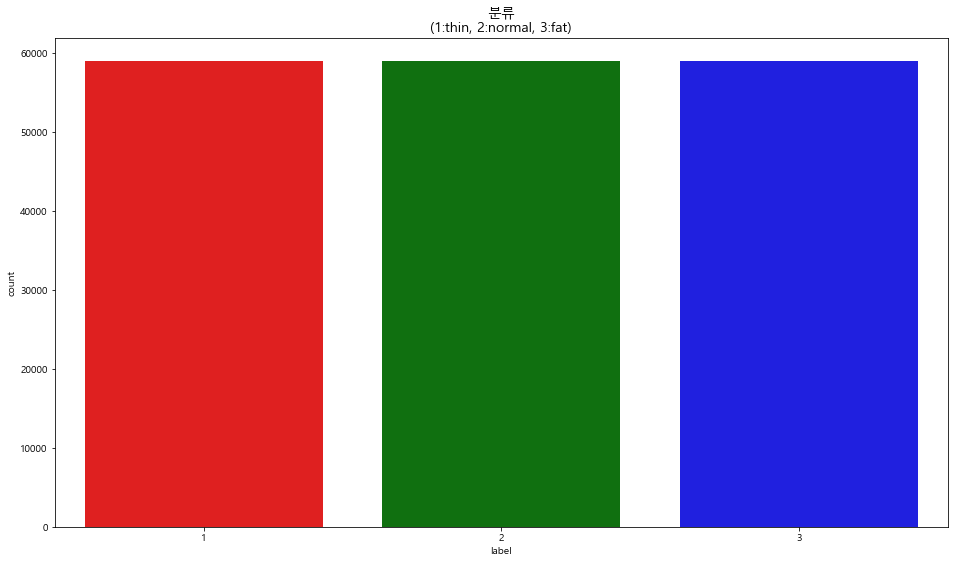

In [19]:
colors=["red","green","blue"]
sns.countplot("label",data=df2,palette=colors)
plt.title("분류\n(1:thin, 2:normal, 3:fat)",fontsize=14)

In [20]:
train_cols=["height","weight"]
X=X_samp[train_cols] #독립변수
y=y_samp["label"] #종속변수

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# 학습용:검증용 8:2로 구분
X_train, X_test, y_train, y_test=train_test_split(
    X,y,test_size=0.2, random_state=0)
model=LogisticRegression() #로지스틱 회귀 모형 생성
model.fit(X_train, y_train) #모형 훈련(학습)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print(model.score(X_train, y_train)) #학습용 데이터셋 예측 정확도
print(model.score(X_test, y_test)) #검증용 데이터셋 예측 정확도

0.9718467115630587
0.9725535643620329


In [23]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred) #실제값과 예측값 비교
cm

array([[11660,    75,     0],
       [  522, 10906,   374],
       [    0,     0, 11841]], dtype=int64)

In [22]:
df_cm=pd.DataFrame(cm, index=[1,2,3], columns=[1,2,3])
df_cm

,1,2,3
1,11659,75,0
2,514,11014,420
3,0,0,11847


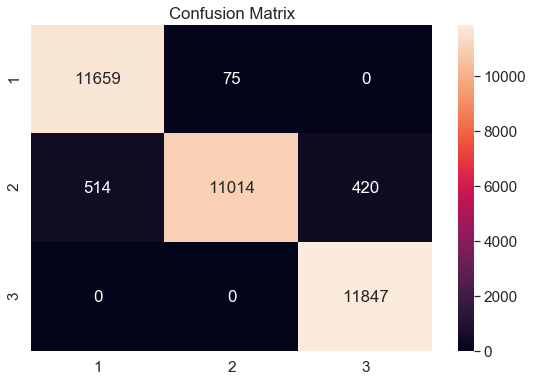

In [23]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True,fmt="d") # fmt="d" 정수형식으로 출력